<a href="https://colab.research.google.com/github/linhoangce/pytorch_crash_course/blob/main/cnn_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

# Load MNIST datasets

In [2]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
image, label = train_data[1]
image.shape, label

(torch.Size([1, 28, 28]), 0)

In [7]:
class_names[label]

'T-shirt/top'

## Visualize random samples

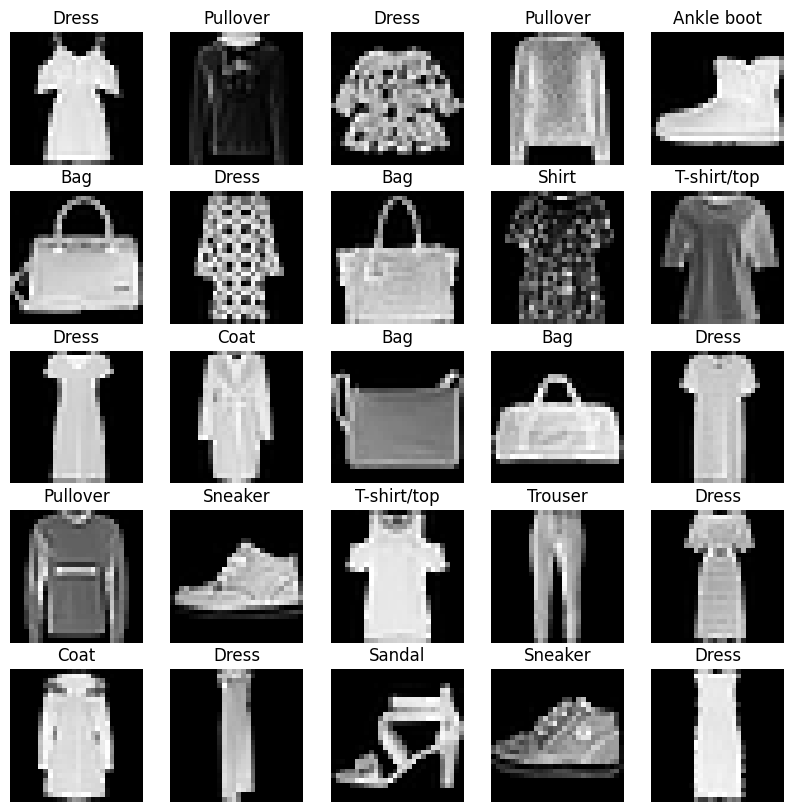

In [8]:
rows, cols = 5, 5
fig = plt.figure(figsize=(10, 10))

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.title(class_names[label])
  plt.imshow(image.squeeze(), cmap='gray')
  plt.axis(False)

## Turn datasets into dataloaders

In [9]:
BATCH_SIZE = 64

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE)

train_dataloader.batch_size, test_dataloader.batch_size

(64, 64)

In [10]:
from math import ceil
ceil(60000/64), ceil(10000/64)

(938, 157)

In [11]:
len(train_dataloader), len(test_dataloader)

(938, 157)

In [12]:
# check what's inside dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [13]:
train_labels_batch

tensor([0, 8, 0, 8, 8, 3, 1, 3, 3, 0, 7, 5, 8, 4, 0, 9, 1, 9, 3, 7, 8, 3, 1, 2,
        9, 3, 6, 3, 6, 3, 9, 0, 6, 6, 5, 6, 3, 0, 8, 7, 8, 2, 3, 3, 5, 3, 1, 7,
        1, 3, 0, 1, 3, 9, 4, 8, 4, 6, 5, 1, 3, 8, 0, 0])

(torch.Size([1, 28, 28]), tensor(5), 'Sandal')

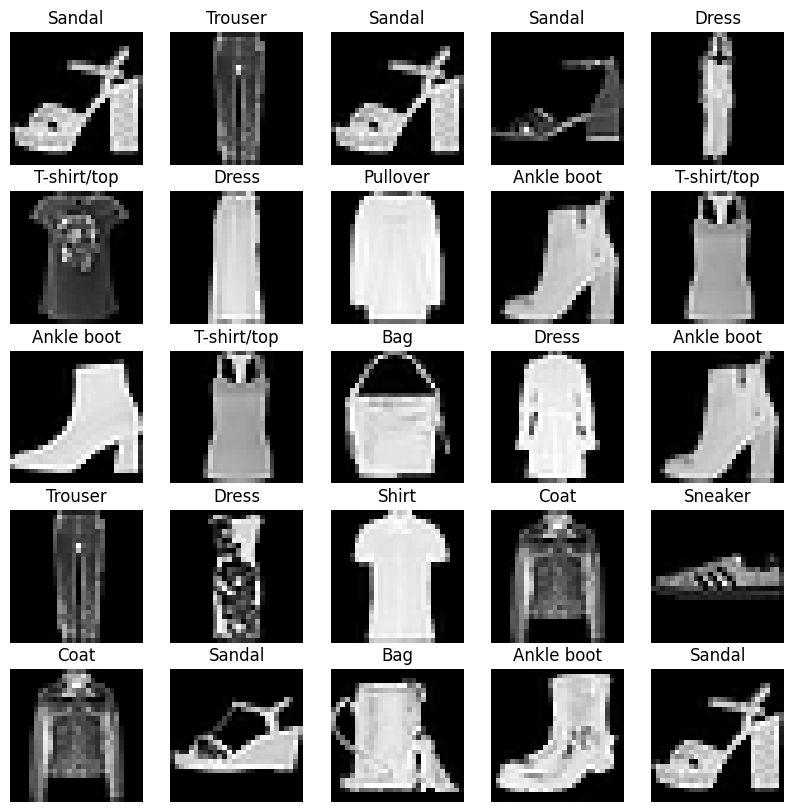

In [14]:
# show some samples
rows, cols = 5, 5
fig = plt.figure(figsize=(10, 10))

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
  image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.title(class_names[label])
  plt.imshow(image.squeeze(), cmap="gray")
  plt.axis(False)

image.shape, label, class_names[label]

## Baseline model

In [15]:
model_0 = nn.Flatten()

x = train_features_batch[0]

x.shape, model_0(x).shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [16]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.stack_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,

                  out_features=output_shape)
    )

  def forward(self, x):
    return self.stack_layer(x)

model_0 = FashionMNISTModelV0(input_shape=28*28,
                              output_shape=len(class_names),
                              hidden_units=10).to("cpu")

model_0

FashionMNISTModelV0(
  (stack_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
model_0(x), model_0(x).shape

(tensor([[ 0.0883,  0.1218,  0.2700,  0.1566, -0.1104, -0.2842, -0.2673, -0.3398,
          -0.2444, -0.0892]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [18]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x), model_0(dummy_x).shape

(tensor([[ 0.1102, -0.2102,  0.6927, -0.1377, -0.1095, -0.7502,  0.1814,  0.0878,
          -0.4143, -0.4010]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

### import helper functions

In [19]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print('file exists!')
else:
  print('Downloading helper_functions.py....')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')

  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

file exists!


## Loss function, optimizer, and accuracy funtion

In [20]:
try:
  import torchmetrics
  print(torchmetrics.__version__)
except:
  !pip install -q torchmetrics
  import torchmetrics
  print(torchmetrics.__version__)

1.7.3


In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

# initialize this accuracy funtion for later use
accuracy_fn_metrics = torchmetrics.Accuracy(task='multiclass',
                                            num_classes=len(class_names))
accuracy_fn_metrics

MulticlassAccuracy()

In [22]:
from helper_functions import accuracy_fn
from timeit import default_timer as timer
from tqdm.auto import tqdm

## Build a ConvNet model based on the architecture of TinyVGG

In [23]:
class TinyVGGModel(nn.Module):
  """Replicates the architecture of TinyVGG model from CNN Explainer website."""
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # this can be omitted, and its default value is still 2
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


### Setup device agnostic

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [25]:
model_2 = TinyVGGModel(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names))
model_2

TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Functionalize train and test steps

In [26]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn: torchmetrics.Accuracy | None,
               device: torch.device):
  """Performs training on a dataloader per batch."""
   # put model to target device
  model.to(device)
  # turn on train mode
  model.train()

  # track loss and acc for accumulation per batch
  train_loss, train_acc = 0, 0

  for X, y in tqdm(data_loader):
    # put data to target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_logits = model(X) # raw outputs of the model should be called logits
    # logits -> probs -> labels
    # `softmax()` doesn't change the position of the highest value
    # it only creates more computational overhead during training/validation
    # y_pred = torch.argmax(torch.softmax(y_logits,
    #                                     dim=1),
    #                       dim=1)
    y_pred = torch.argmax(y_logits,
                          dim=1)

    # calculate loss
    # this variable is used for backward pass
    # it cannot be accumulated, that's why there's `train_loss`
    loss = loss_fn(y_logits, y)

    train_loss += loss
    train_acc += accuracy_fn(y_true=y.cpu(),
                      y_pred=y_pred.cpu())

    optimizer.zero_grad()

    # backward pass
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")


In [27]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn: torchmetrics.Accuracy | None,
              device: torch.device):
  """Performs testing for trained model on dataloader."""
  # put device on target device
  model.to(device)

  loss, acc = 0, 0

  # turn on eval mode
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # put data to target device
      X, y = X.to(device), y.to(device)

      # forward pass
      y_logits = model(X)

      # logits -> labels
      y_pred = torch.argmax(y_logits,
                            dim=1)

      # calculate loss

      loss += loss_fn(y_logits, y)
      acc += accuracy_fn(y_true=y.cpu(),
                         y_pred=y_pred.cpu())

    # calculate mean loss and accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    print(f"Test loss: {loss:.4f} | Test acc: {acc:.2f}%")

In [28]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn: torchmetrics.Accuracy | None,
               device: torch.device):
  """Evaluates model on dataloader and returns loss and accuracy."""
  # put model to target device
  model.to(device)

  loss, acc = 0, 0

  # turn on eval mode
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # put data to target device
      X, y = X.to(device), y.to(device)

      # forward pass
      y_logits = model(X)

      # get predictions
      y_pred = torch.argmax(y_logits,
                            dim=1)

      # calculate loss
      loss += loss_fn(y_logits, y)
      acc += accuracy_fn(y_true=y.cpu(),
                      y_pred=y_pred.cpu())
    print('dataloader len:', len(data_loader))
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [30]:
start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch+1}")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time = timer()
total_train_time_model_2 = end_time - start_time
print(f'Total training time: {total_train_time_model_2}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Train loss: 0.6783 | Train acc: 75.29%


  0%|          | 0/157 [00:00<?, ?it/s]

Test loss: 0.4988 | Test acc: 80.30%
Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Train loss: 0.3839 | Train acc: 86.06%


  0%|          | 0/157 [00:00<?, ?it/s]

Test loss: 0.3828 | Test acc: 86.10%
Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Train loss: 0.3357 | Train acc: 87.85%


  0%|          | 0/157 [00:00<?, ?it/s]

Test loss: 0.3631 | Test acc: 86.35%
Total training time: 35.852022911000006


In [31]:
model_2_results = eval_model(model=model_2,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device=device)
model_2_results

  0%|          | 0/157 [00:00<?, ?it/s]

dataloader len: 157


{'model_name': 'TinyVGGModel',
 'model_loss': 0.3630514442920685,
 'model_acc': 86.34554140127389}

## Make predictions and Visualize the trained model

In [72]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device):
  pred_probs = []

  model.to(device)

  model.eval()
  with torch.inference_mode():
    for sample in data:
      # add a batch dimension to the sample and send to target device
      sample = sample.unsqueeze(dim=0).to(device)

      # forward pass
      pred_logits = model(sample)
      # logits -> probability
      pred_prob = torch.softmax(pred_logits.squeeze(),
                                dim=0)
      pred_probs.append(pred_prob.cpu())

  # stack pred_probs to turn list into tensor
  return torch.stack(pred_probs)

In [73]:
image, label = test_data[0][:10]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [74]:
test_data[0][1:2]

(9,)

In [75]:
# select random data samples
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),
                                   k=100):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [76]:
class_names[test_labels[0]]

'Pullover'

Text(0.5, 1.0, 'T-shirt/top')

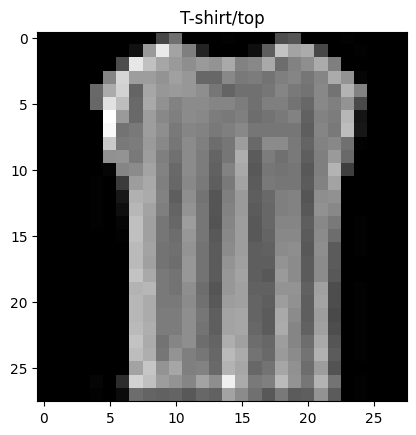

In [77]:
plt.imshow(test_samples[1].squeeze(),
           cmap='gray')
plt.title(class_names[test_labels[1]])

In [78]:
# make predictions and get prediction probabilities
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)
len(pred_probs), pred_probs[:5]

(100,
 tensor([[4.3552e-03, 1.3133e-03, 1.0073e-01, 7.9727e-03, 2.3836e-02, 5.8358e-04,
          8.6033e-01, 1.5499e-05, 8.6070e-04, 8.1152e-06],
         [7.3111e-01, 1.0301e-04, 1.1239e-02, 4.2177e-03, 7.8560e-06, 4.2880e-06,
          2.5328e-01, 5.3034e-06, 2.7119e-05, 1.2182e-05],
         [8.9934e-07, 2.3240e-08, 4.8161e-05, 2.0282e-05, 1.1717e-05, 6.4066e-05,
          3.0026e-07, 4.2719e-05, 9.9981e-01, 5.5625e-07],
         [6.0150e-05, 1.0812e-06, 2.1153e-05, 2.3209e-05, 3.8555e-06, 5.2129e-02,
          4.9926e-06, 9.3353e-01, 4.7324e-04, 1.3755e-02],
         [2.7072e-02, 8.8785e-02, 4.0657e-03, 8.3304e-01, 3.6018e-03, 3.2483e-03,
          9.2202e-03, 4.9864e-03, 1.0661e-03, 2.4916e-02]]))

In [80]:
# convert pred probabilities to label
pred_classes = pred_probs.argmax(dim=1)
pred_classes[:5]

tensor([6, 0, 8, 7, 3])

In [82]:
plt.figure(figsize=(100, 100))
rows, cols = 10, 10

for i, image in enumerate(test_samples):
  # create subplot
  plt.subplot(rows, cols, i+1)

  # plot image
  plt.imshow(image.squeeze(),
             cmap='gray')
  plt.axis(False)

  # find prediction label in text
  pred_label = class_names[pred_classes[i]]

  # truth label
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text,
              fontsize=30,
              c='g')
  else:
    plt.title(title_text,
              fontsize=30,
              c='r')


## Confusion Matrix

In [84]:
y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader,
                   desc='Making predictions...'):
    # send data to target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_logits = model_2(X)

    # logits -> labels
    y_pred = torch.argmax(y_logits,
                          dim=1)

    y_preds.append(y_pred.cpu())

# concatenate prediction list into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:2]

Making predictions...:   0%|          | 0/157 [00:00<?, ?it/s]

tensor([9, 2])

In [85]:
len(y_pred_tensor)

10000

In [86]:
# install mlxtend
try:
  import mlxtend
  print(mlxtend.__version__)
  assert (mlxtend.__version__ > '0.19.0'), 'mlxtend version should be greater than 0.19.0'
except:
  !pip instal -q mlxtend
  import mlxtend
  print(mlxtend.__version__)

0.23.4


In [90]:
y_pred_tensor[:20]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0])

In [89]:
test_data.targets[:20]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0])

In [91]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [93]:
# set up confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',
                          num_classes=len(class_names))
confmat_tensor = confmat(y_pred_tensor,
                         target=test_data.targets)
confmat_tensor

tensor([[912,   0,  22,  22,   3,   1,  30,   0,  10,   0],
        [ 10, 957,   5,  21,   3,   0,   1,   0,   3,   0],
        [ 22,   0, 884,  12,  35,   0,  45,   0,   2,   0],
        [ 50,   1,  11, 891,  20,   0,  23,   0,   4,   0],
        [  4,   0, 191,  50, 628,   0, 116,   0,  11,   0],
        [  0,   0,   0,   2,   0, 969,   0,  11,   1,  17],
        [244,   0, 116,  31,  40,   2, 542,   0,  25,   0],
        [  0,   0,   0,   0,   0,  32,   0, 917,   0,  51],
        [  2,   1,  17,   2,   1,   6,   2,   3, 966,   0],
        [  0,   0,   0,   0,   0,   5,   0,  27,   0, 968]])

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

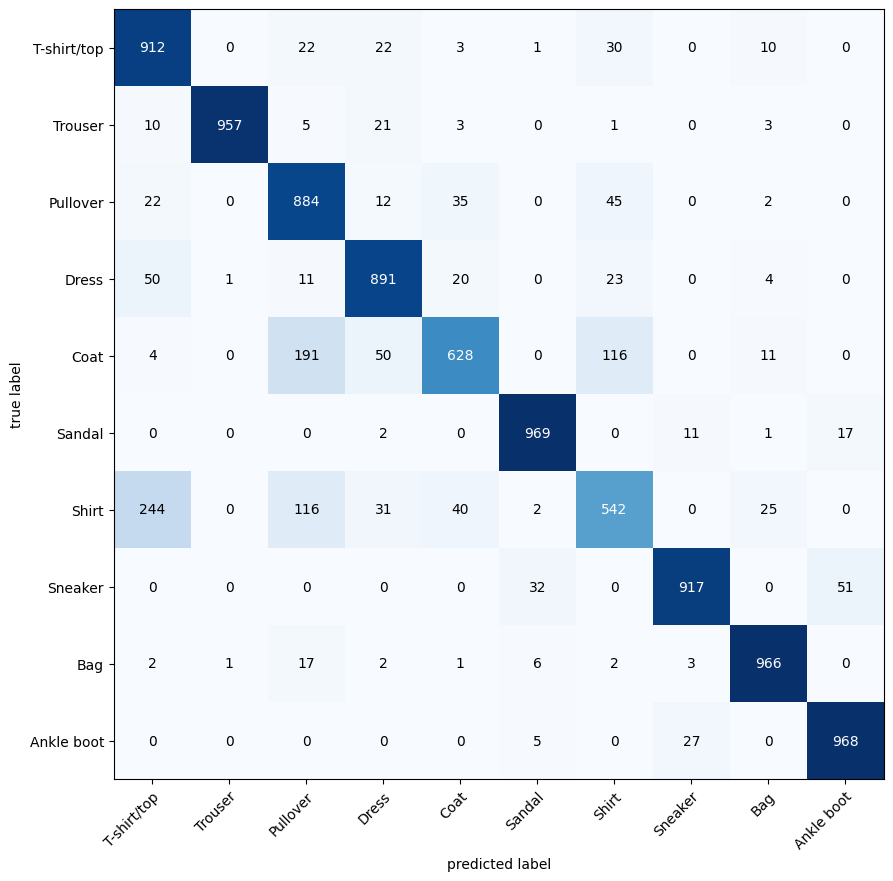

In [94]:
plot_confusion_matrix(confmat_tensor.numpy(),
                      figsize=(10, 10),
                      class_names=class_names)

## Other stuff

In [95]:
dummy_x = torch.rand([1, 3, 64, 64])
dummy_x.shape, dummy_x

(torch.Size([1, 3, 64, 64]),
 tensor([[[[0.2414, 0.0339, 0.2992,  ..., 0.0125, 0.6972, 0.7897],
           [0.2945, 0.8507, 0.9811,  ..., 0.5368, 0.1270, 0.2598],
           [0.9651, 0.8108, 0.3438,  ..., 0.2770, 0.3614, 0.5396],
           ...,
           [0.2868, 0.5298, 0.0634,  ..., 0.3104, 0.3367, 0.3092],
           [0.4036, 0.9845, 0.2029,  ..., 0.4663, 0.1740, 0.5253],
           [0.8197, 0.5745, 0.1629,  ..., 0.1993, 0.7304, 0.7337]],
 
          [[0.2419, 0.4471, 0.1015,  ..., 0.4002, 0.5609, 0.2099],
           [0.2655, 0.2290, 0.5238,  ..., 0.2721, 0.0813, 0.2871],
           [0.0019, 0.6464, 0.4259,  ..., 0.0114, 0.2424, 0.5546],
           ...,
           [0.0761, 0.2859, 0.4613,  ..., 0.3972, 0.2344, 0.0921],
           [0.8383, 0.5976, 0.3190,  ..., 0.5311, 0.7900, 0.0590],
           [0.2785, 0.6437, 0.5552,  ..., 0.6835, 0.8646, 0.4695]],
 
          [[0.6329, 0.6559, 0.2557,  ..., 0.0184, 0.2051, 0.4877],
           [0.7282, 0.5259, 0.0089,  ..., 0.3995, 0.4964, 0.02

In [96]:
conv2d = nn.Conv2d(in_channels=3,
                   out_channels=10,
                   kernel_size=3,
                   stride=1)
conv2d(dummy_x)

tensor([[[[-0.0154, -0.1120,  0.0272,  ..., -0.1909, -0.0017,  0.0997],
          [ 0.2386, -0.0729, -0.1115,  ..., -0.1143, -0.0441, -0.2039],
          [-0.0194, -0.1879, -0.1174,  ..., -0.2699,  0.0350, -0.3732],
          ...,
          [-0.0087, -0.1607, -0.2329,  ..., -0.0207, -0.3942,  0.1068],
          [-0.3616,  0.0245,  0.0303,  ...,  0.2020, -0.0670, -0.2326],
          [-0.1074,  0.1134, -0.0696,  ..., -0.2763, -0.0785, -0.0158]],

         [[ 0.0086,  0.2819, -0.1830,  ..., -0.0217,  0.2521,  0.3490],
          [ 0.0540,  0.4444,  0.1802,  ...,  0.4685,  0.4535,  0.3542],
          [ 0.1895,  0.4285,  0.1292,  ...,  0.3352,  0.0126,  0.2264],
          ...,
          [ 0.3241,  0.4785, -0.1671,  ..., -0.0416,  0.2930,  0.2784],
          [ 0.2779,  0.0869, -0.1145,  ...,  0.6372,  0.1810,  0.0568],
          [ 0.2603, -0.0613,  0.1212,  ...,  0.2313,  0.2912, -0.0840]],

         [[ 0.0350,  0.2509,  0.0218,  ...,  0.1423,  0.4208,  0.2580],
          [ 0.0775,  0.2282,  

In [99]:
conv2d = nn.Conv2d(in_channels=3,
                   out_channels=10,
                   kernel_size=4,
                   stride=2)
conv2d(dummy_x)

tensor([[[[-0.2431,  0.0356, -0.1321,  ...,  0.0653, -0.1762,  0.1131],
          [ 0.0034, -0.0120, -0.1579,  ...,  0.0127, -0.1082,  0.2651],
          [-0.3423,  0.2335,  0.1840,  ..., -0.0307, -0.0852, -0.1030],
          ...,
          [ 0.0292, -0.0653, -0.1635,  ..., -0.1938, -0.2872,  0.0988],
          [ 0.0286, -0.0095, -0.0795,  ..., -0.1763,  0.0620,  0.1589],
          [-0.0091,  0.1482,  0.1970,  ...,  0.1272, -0.0195,  0.1010]],

         [[ 0.1897,  0.1606,  0.1719,  ...,  0.0988,  0.3177,  0.3021],
          [ 0.2750,  0.2363,  0.0870,  ...,  0.2002,  0.2732,  0.2943],
          [ 0.1979,  0.1759,  0.1674,  ...,  0.2752,  0.3803,  0.0938],
          ...,
          [-0.1362,  0.4021,  0.4246,  ...,  0.2877,  0.3054,  0.3981],
          [ 0.2004,  0.3605,  0.2582,  ...,  0.3175,  0.5090,  0.0608],
          [ 0.2644,  0.2614,  0.3747,  ...,  0.2309,  0.0472,  0.2137]],

         [[ 0.0110, -0.1189, -0.0312,  ...,  0.1339, -0.1399, -0.1232],
          [-0.2814, -0.1989,  

## Improving the model's performance

In [113]:
# redefine for practice
class TinyVGGModelV2(nn.Module):
  """Replicates the architecture of TinyVGG model from CNN Explainer website."""

  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [114]:
model_3 = TinyVGGModelV2(input_shape=1,
                         output_shape=len(class_names),
                         hidden_units=10)
model_3

TinyVGGModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [115]:
loss_fn = nn.CrossEntropyLoss()
optimizer_adam = torch.optim.Adam(params=model_3.parameters(),
                             lr=0.01)

In [116]:
# setup pytorch device - device-agnostic execution
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [117]:
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch+1}")

  train_step(model=model_3,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer_adam,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_3,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Train loss: 0.4694 | Train acc: 82.85%


  0%|          | 0/157 [00:00<?, ?it/s]

Test loss: 0.3789 | Test acc: 86.12%
Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Train loss: 0.3552 | Train acc: 87.11%


  0%|          | 0/157 [00:00<?, ?it/s]

Test loss: 0.4042 | Test acc: 85.47%
Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Train loss: 0.3330 | Train acc: 87.83%


  0%|          | 0/157 [00:00<?, ?it/s]

Test loss: 0.3340 | Test acc: 87.89%


In [118]:
model_4 = TinyVGGModelV2(input_shape=1,
                         output_shape=len(class_names),
                         hidden_units=32)
model_4

TinyVGGModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [119]:
# reset batchsize to 128
BATCH_SIZE = 128

train_dataloader_128 = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader_128 = DataLoader(dataset=test_data,
                                 batch_size=BATCH_SIZE)
len(train_dataloader_128), len(test_dataloader_128)

(469, 79)

In [120]:
# adjust learning rate for optimizer as well
optimizer_adam = torch.optim.Adam(params=model_4.parameters(),
                                  lr=0.001)

In [121]:
epochs = 10

start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch+1}")

  train_step(model=model_4,
             data_loader=train_dataloader_128,
             loss_fn=loss_fn,
             optimizer=optimizer_adam,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_4,
            data_loader=test_dataloader_128,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time = timer()
total_train_time_model_4 = end_time - start_time
print(f'Total training time: {total_train_time_model_4}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.5447 | Train acc: 80.27%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.3756 | Test acc: 86.43%
Epoch: 2


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.3257 | Train acc: 88.35%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.3270 | Test acc: 88.61%
Epoch: 3


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.2770 | Train acc: 89.98%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.2959 | Test acc: 89.35%
Epoch: 4


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.2462 | Train acc: 91.22%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.2867 | Test acc: 90.07%
Epoch: 5


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.2267 | Train acc: 91.86%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.2594 | Test acc: 90.59%
Epoch: 6


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.2122 | Train acc: 92.34%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.2628 | Test acc: 90.69%
Epoch: 7


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.1978 | Train acc: 93.03%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.2391 | Test acc: 91.51%
Epoch: 8


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.1858 | Train acc: 93.43%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.2270 | Test acc: 91.73%
Epoch: 9


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.1731 | Train acc: 93.77%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.2258 | Test acc: 92.06%
Epoch: 10


  0%|          | 0/469 [00:00<?, ?it/s]

Train loss: 0.1605 | Train acc: 94.16%


  0%|          | 0/79 [00:00<?, ?it/s]

Test loss: 0.2240 | Test acc: 92.02%
Total training time: 112.98213132100045
